# Discriptive Analysis and Data Cleaning

In [2]:
import pandas as pd
import numpy as np

C:\Users\HARSHAVA-B024DC\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HARSHAVA-B024DC\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
agedf = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
agedf = pd.get_dummies(agedf);

In [9]:
given = agedf[agedf['Age'].notna()]
notgiven = agedf[agedf['Age'].isna()]

y=given['Age']
x=given.drop('Age', axis=1)

In [10]:
# Handle missing values in AGE using RandomForestRegressor
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)
model = RandomForestRegressor()
model.fit(x_imputed, y)
notgiven_imputed = imputer.transform(notgiven.drop('Age', axis=1)) # Handle missing values in the rows where Age is not given
predicted_ages = model.predict(notgiven_imputed)
df.loc[df['Age'].isna(), 'Age'] = predicted_ages # Fill the missing Age values in the original dataframe
print("Missing values in 'Age' after imputation:", df['Age'].isna().sum())
print(df.loc[df.index[notgiven.index]].head())

Missing values in 'Age' after imputation: 0
    PassengerId  Survived  Pclass  \
10          902         0       3   
22          914         1       1   
29          921         0       3   
33          925         1       3   
36          928         1       3   

                                                 Name     Sex        Age  \
10                                   Ilieff, Mr. Ylio    male  27.906876   
22               Flegenheim, Mrs. Alfred (Antoinette)  female  37.578333   
29                                  Samaan, Mr. Elias    male  28.038333   
33  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"  female  18.122695   
36                                Roth, Miss. Sarah A  female  21.012405   

    SibSp  Parch      Ticket     Fare Cabin Embarked  
10      0      0      349220   7.8958   NaN        S  
22      0      0    PC 17598  31.6833   NaN        S  
29      2      0        2662  21.6792   NaN        C  
33      1      2  W./C. 6607  23.4500   NaN        S  
3

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

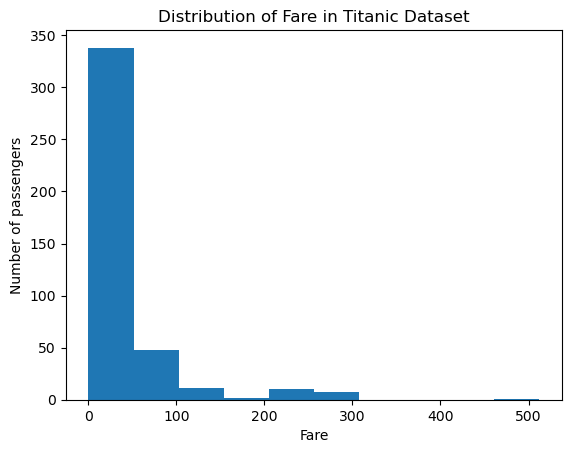

In [12]:
# Handling Missing value in Fare
import matplotlib.pyplot as plt
plt.hist(df['Fare'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.title(f'Distribution of Fare in Titanic Dataset')
plt.show()

In [13]:
# Fill the missing value with the median Fare
median_fare = df['Fare'].median()
df['Fare']=df['Fare'].fillna(median_fare)

In [14]:
# Removing Cabin column
df = df.drop('Cabin',axis=1)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Visualization

In [16]:
#How many Passenges in ship
len(df['PassengerId'])

418

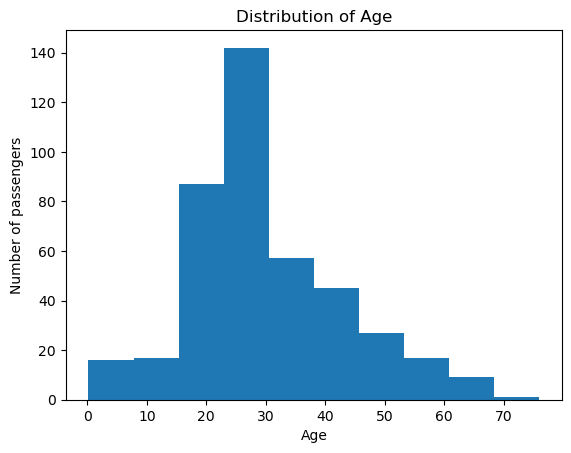

In [17]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title(f'Distribution of Age')
plt.show()

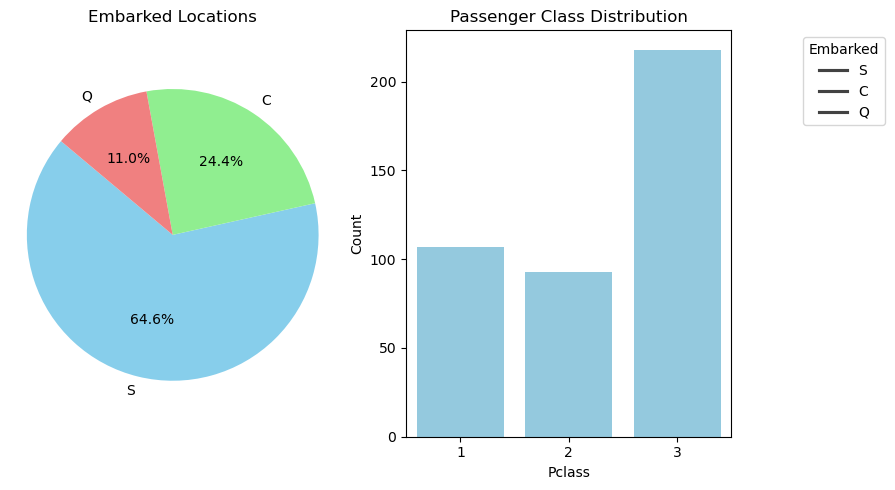

 Q - Queenstown 
 C - Cherbourg 
 S - Southampton


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

# Pie chart for embarked locations (on ax1)
embarked_counts = df['Embarked'].value_counts()
ax1.pie(embarked_counts.values, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_title('Embarked Locations')
ax1.axis('equal')  


pclass_counts = df['Pclass'].value_counts()
sns.barplot(ax=ax2, x=pclass_counts.index, y=pclass_counts.values, color='skyblue')
ax2.set_title('Passenger Class Distribution')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Count')
plt.xticks(rotation=0) 
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.3)  
plt.legend(embarked_counts.index, loc='upper left', bbox_to_anchor=(1.2, 1), title="Embarked") 

plt.tight_layout()
plt.show()

print(" Q - Queenstown", '\n', "C - Cherbourg", '\n', "S - Southampton")


In [19]:
df['family'] = df['SibSp'] + df['Parch']  # new column for the sum


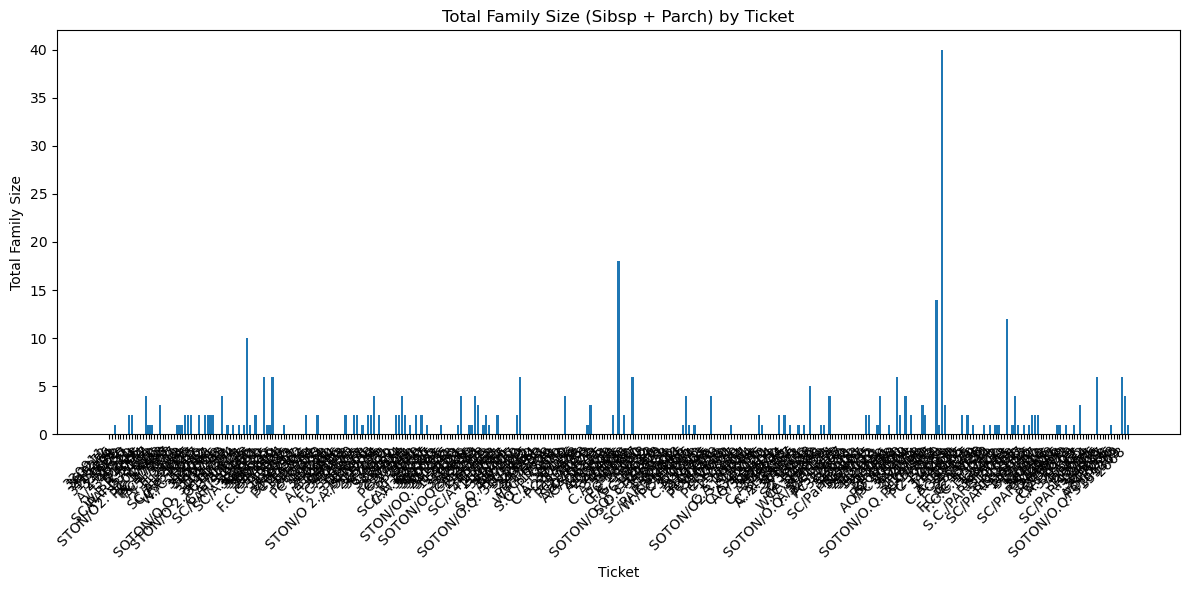

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
plt.bar(df['Ticket'].unique(), df.groupby('Ticket')['family'].sum())
plt.title('Total Family Size (Sibsp + Parch) by Ticket')
plt.xlabel('Ticket')
plt.ylabel('Total Family Size')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [22]:

df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
188,1080,1,3,"Sage, Miss. Ada",female,16.865000,8,2,CA. 2343,69.55,S,10
342,1234,0,3,"Sage, Mr. John George",male,38.680033,1,9,CA. 2343,69.55,S,10
360,1252,0,3,"Sage, Master. William Henry",male,14.500000,8,2,CA. 2343,69.55,S,10
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,32.925033,1,9,CA. 2343,69.55,S,10


In [23]:
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

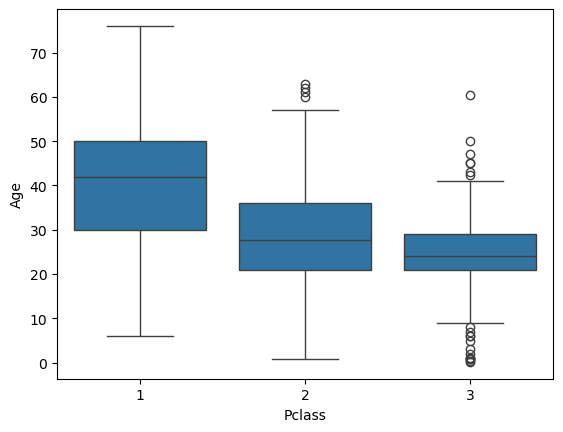

In [24]:
sns.boxplot(x='Pclass', y='Age', data=df)  
plt.show()


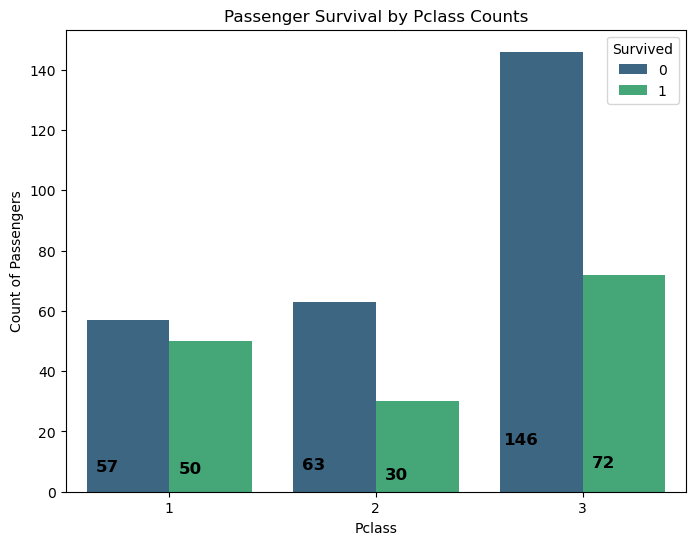

In [25]:
# Passenger Survival Rate by Pclass

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
survival_counts = sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')  

# Annotations
for container in survival_counts.containers:
    for bar in container:
        x, y = bar.get_xy()
        height = bar.get_height()
        label = f"{int(height)}"  
        plt.text(x + 0.1, y + height * 0.1, label, ha='center', va='bottom', fontsize=12, fontweight='bold') 

plt.title('Passenger Survival by Pclass Counts')
plt.xlabel('Pclass')
plt.ylabel('Count of Passengers')
plt.legend(title='Survived')
plt.xticks(rotation=0) 
plt.show()


Sex
male      266
female    152
Name: count, dtype: int64


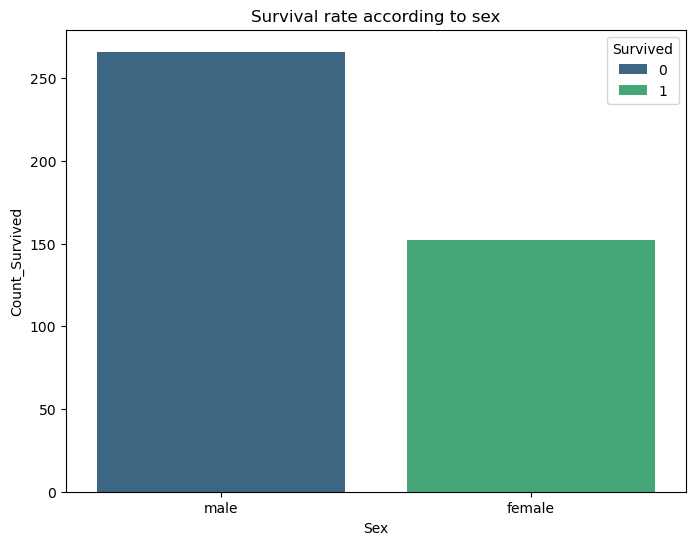

In [26]:
# Survival Rate according to SEX

sex_survival_count=df['Sex'].value_counts()
df['sex']=df['Sex'].value_counts('Survived').fillna(0)
print(sex_survival_count)

plt.figure(figsize=(8,6))
sex_survival_counts=sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')

plt.title("Survival rate according to sex")
plt.xlabel("Sex")
plt.ylabel("Count_Survived")
plt.xticks(rotation=0)
plt.show()

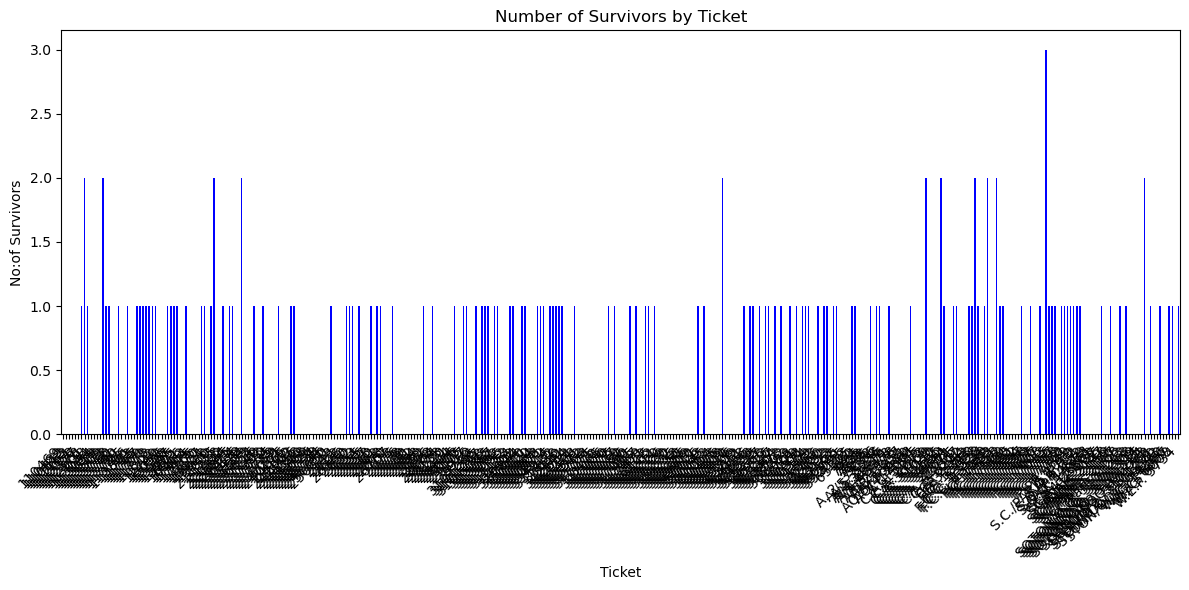

In [29]:
#No:of Survivors by Ticket ID
groupsurvived = df.groupby('Ticket')['Survived'].sum()

plt.figure(figsize=(12, 6))
groupsurvived.plot(kind='bar', color='blue')
plt.title('Number of Survivors by Ticket')
plt.xlabel('Ticket')
plt.ylabel('No:of Survivors')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


C:\Users\HARSHAVA-B024DC\AppData\Local\Temp\ipykernel_7656\1995633797.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Not Survived', shade=True, ax=axs[1])
C:\Users\HARSHAVA-B024DC\AppData\Local\Temp\ipykernel_7656\1995633797.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', shade=True, ax=axs[1])


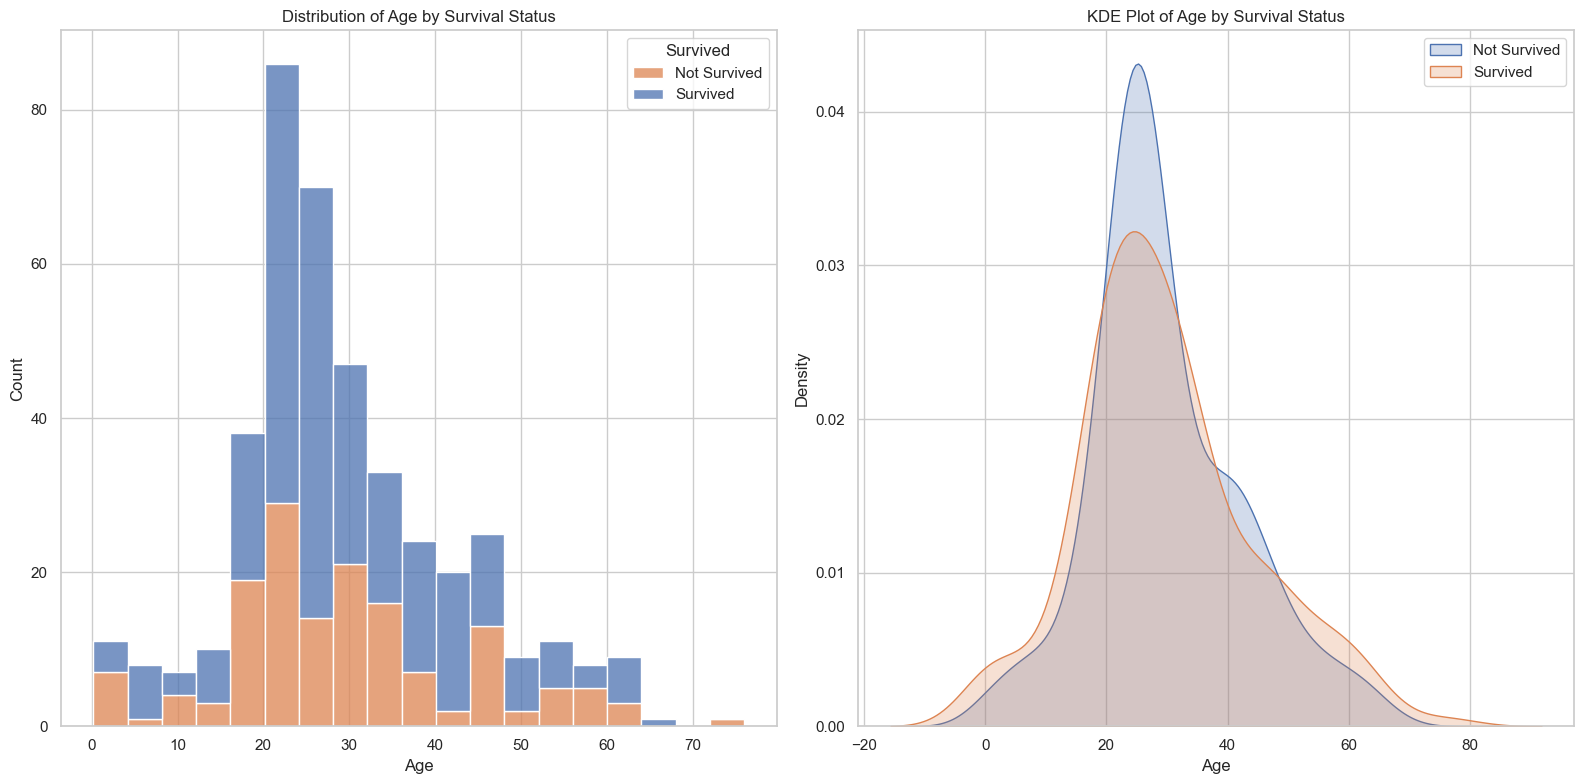

In [30]:
# Distribution of Age by Survival Status

sns.set(style="whitegrid") 

fig, axs = plt.subplots(1, 2, figsize=(16, 8)) 

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=False, ax=axs[0])
axs[0].set_title('Distribution of Age by Survival Status')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].legend(title='Survived', labels=['Not Survived', 'Survived'])

sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Not Survived', shade=True, ax=axs[1])
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', shade=True, ax=axs[1])
axs[1].set_title('KDE Plot of Age by Survival Status')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.tight_layout()
plt.show()


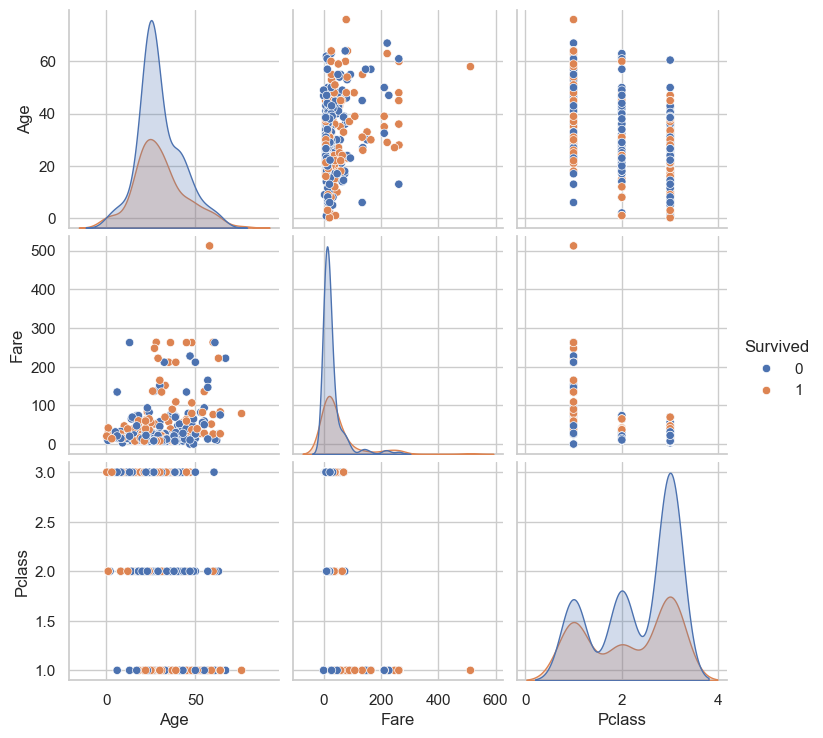

In [33]:
# Pair plot to show pairwise relationships
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde')
plt.show()


In [31]:
# Saving the cleaned data into new CSV
df.to_csv("cleaned_titanic.csv",index=False)